# Qual é o melhor plano?

Você trabalha como analista para a empresa de telecomunicações Megaline. A empresa oferece aos clientes dois planos pré-pagos: Surf e Ultimate. O departamento comercial quer saber qual dos planos gera mais receita para ajustar o orçamento de publicidade.

Você vai realizar uma análise preliminar dos planos com base em uma pequena seleção de clientes. Você terá dados de 500 clientes da Megaline: que clientes são, de onde eles são, qual plano usam e o número de chamadas e mensagens realizadas em 2018. Seu trabalho é analisar o comportamento dos clientes e determinar qual plano pré-pago gera mais receita.

# Projeto
Eu irei ler os arquivos, buscar problemas, solucionar-los, fazer engenharia de carácteristica, e demostrar os resultados por meio de graficos ou strings.

## Inicialização

In [51]:
# Carregando todas as bibliotecas
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats as st
import matplotlib.pyplot as plt
from calendar import month_name


## Carregue os dados

In [52]:
# Carregue os arquivos de dados em diferentes DataFrames
plans = pd.read_csv(r"C:\Users\jonat\Documents\GitHub\Sprints\sprint 4\tables\megaline_plans.csv")
calls = pd.read_csv(r"C:\Users\jonat\Documents\GitHub\Sprints\sprint 4\tables\megaline_calls.csv")
messages = pd.read_csv(r"C:\Users\jonat\Documents\GitHub\Sprints\sprint 4\tables\megaline_messages.csv")
internet = pd.read_csv(r"C:\Users\jonat\Documents\GitHub\Sprints\sprint 4\tables\megaline_internet.csv")
users = pd.read_csv(r"C:\Users\jonat\Documents\GitHub\Sprints\sprint 4\tables\megaline_users.csv")


In [53]:
plans.head(1),calls.head(1),messages.head(1),internet.head(1),calls.head(1)

(   messages_included  mb_per_month_included  minutes_included  \
 0                 50                  15360               500   
 
    usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute plan_name  
 0               20          10             0.03            0.03      surf  ,
         id  user_id   call_date  duration
 0  1000_93     1000  2018-12-27      8.52,
          id  user_id message_date
 0  1000_125     1000   2018-12-27,
         id  user_id session_date  mb_used
 0  1000_13     1000   2018-12-29    89.86,
         id  user_id   call_date  duration
 0  1000_93     1000  2018-12-27      8.52)

Todas as colunas corretamente feitas, indica que não precisa mudar o "," do csv para outra coisa como ";"

## Prepare os dados

[Os dados deste projeto estão divididos em várias tabelas. Explore cada uma para obter uma compreensão inicial dos dados. Faça correções em cada tabela, se necessário.]

## Planos

In [54]:
# Imprima informações gerais/resumo sobre o DataFrame dos planos

plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 260.0+ bytes


In [55]:
# Imprima uma amostra de dados dos planos

plans

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


Um df pequeno com apenas 2 linhas com nomes das colunas corretos, tipos de dados, e dados em si. Nada para corrijir.

## Corrija os dados

Sem erros para corrigir

## Enriqueça os dados

Sem modificações para fazer.

## Usuários

In [56]:
# Imprima informações gerais/resumo sobre o DataFrame dos usuários

users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [57]:
# Imprima uma amostra de dados dos usuários

users.sample(10)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
200,1200,Delmar,Cross,45,"Boston-Cambridge-Newton, MA-NH MSA",2018-11-27,surf,NaN
276,1276,Karmen,Carney,20,"Phoenix-Mesa-Chandler, AZ MSA",2018-02-14,surf,NaN
454,1454,Kymberly,Cohen,56,"San Antonio-New Braunfels, TX MSA",2018-05-30,ultimate,NaN
194,1194,Robert,Mclean,40,"San Jose-Sunnyvale-Santa Clara, CA MSA",2018-05-31,surf,NaN
280,1280,Jasper,Berry,29,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-06-23,surf,NaN
152,1152,Merrill,Hogan,35,"Orlando-Kissimmee-Sanford, FL MSA",2018-11-01,surf,NaN
430,1430,Myung,Pugh,63,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-12-07,surf,NaN
219,1219,Gavin,Keller,51,"Detroit-Warren-Dearborn, MI MSA",2018-05-14,surf,NaN
350,1350,Al,Rasmussen,29,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-03-09,surf,NaN
368,1368,Enola,Ray,60,"Pittsburgh, PA MSA",2018-05-20,ultimate,NaN


O df tem uma coluna que não esta no tipo "datetime", na coluna churn_date tem valores nulos, porém é esperado pois são os clientes que não canselaram. 


### Corrija os dados

Transformar a coluna reg_date, churn_date no tipo data frame

In [58]:
users['churn_date'] = pd.to_datetime(users['churn_date'], errors='coerce')
users['reg_date'] = pd.to_datetime(users['reg_date'], errors='coerce')
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
 7   churn_date  34 non-null     datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


### Enriqueça os dados

NaN

## Chamadas

In [59]:
# Imprima informações gerais/resumo sobre o DataFrame das chamadas

calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [60]:
# Imprima uma amostra de dados das chamadas
calls.sample(10)


,id,user_id,call_date,duration
131518,1472_560,1472,2018-04-14,4.51
96943,1346_169,1346,2018-09-06,6.06
52215,1187_408,1187,2018-04-13,19.34
100161,1359_21,1359,2018-10-25,4.83
54138,1196_13,1196,2018-08-10,0.00
9674,1043_182,1043,2018-12-26,6.30
92571,1333_74,1333,2018-12-27,4.81
57141,1203_532,1203,2018-06-18,1.83
68533,1246_552,1246,2018-03-28,11.85
91367,1329_206,1329,2018-10-28,7.59


Identifiquei que a coluna call_date não está no tipo dados, e que a muitos valores 0.00 na duração da call, podem ser calls que não foram atendidas, portanto não irei mofidificar. 

### Corrija os dados

Corrijindo o tipo da coluna de datas

In [61]:
calls['call_date'] = pd.to_datetime(calls['call_date'], errors='coerce')
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.2+ MB


### Enriqueça os dados

Criarei uma nova coluna com apenas os meses

In [62]:
calls['month_name'] = calls['call_date'].dt.month.map(lambda x: month_name[x])
calls

,id,user_id,call_date,duration,month_name
0,1000_93,1000,2018-12-27,8.52,December
1,1000_145,1000,2018-12-27,13.66,December
2,1000_247,1000,2018-12-27,14.48,December
3,1000_309,1000,2018-12-28,5.76,December
4,1000_380,1000,2018-12-30,4.22,December
...,...,...,...,...,...
137730,1499_199,1499,2018-11-21,8.72,November
137731,1499_200,1499,2018-10-20,10.89,October
137732,1499_201,1499,2018-09-21,8.12,September
137733,1499_202,1499,2018-10-10,0.37,October


## Mensagens

In [63]:
# Imprima informações gerais/resumo sobre o DataFrame das mensagens

messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [64]:
# Imprima uma amostra dos dados das mensagens

messages.head(10)

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26
5,1000_346,1000,2018-12-29
6,1000_386,1000,2018-12-30
7,1000_413,1000,2018-12-31
8,1000_502,1000,2018-12-27
9,1000_525,1000,2018-12-28


Sem dados nulos, porém na coluna message date não está no tipo datetime.

### Corrija os dados

Corrijindo o tipo da coluna de data.

In [65]:
messages['message_date'] = pd.to_datetime(messages['message_date'], errors='coerce')
messages['message_date'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 76051 entries, 0 to 76050
Series name: message_date
Non-Null Count  Dtype         
--------------  -----         
76051 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 594.3 KB


### Enriqueça os dados

Vou fazer uma tabela que só tera os meses.

In [66]:
messages['month_name'] = messages['message_date'].dt.month.map(lambda x: month_name[x])
messages

,id,user_id,message_date,month_name
0,1000_125,1000,2018-12-27,December
1,1000_160,1000,2018-12-31,December
2,1000_223,1000,2018-12-31,December
3,1000_251,1000,2018-12-27,December
4,1000_255,1000,2018-12-26,December
...,...,...,...,...
76046,1497_526,1497,2018-12-24,December
76047,1497_536,1497,2018-12-24,December
76048,1497_547,1497,2018-12-31,December
76049,1497_558,1497,2018-12-24,December


## Internet

In [67]:
# Imprima informações gerais/resumo sobre o DataFrame da internet

internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [68]:
#  Imprima uma amostra de dados para o tráfego da internet
internet.sample(10)


,id,user_id,session_date,mb_used
25139,1117_72,1117,2018-10-15,67.32
62676,1288_77,1288,2018-10-17,449.15
6694,1038_182,1038,2018-11-30,610.86
50758,1226_239,1226,2018-07-30,396.61
82823,1387_39,1387,2018-12-13,62.67
33481,1152_50,1152,2018-12-05,918.06
30978,1141_344,1141,2018-10-17,737.88
102574,1491_9,1491,2018-11-24,652.44
35688,1160_392,1160,2018-06-23,282.86
95467,1445_115,1445,2018-07-12,0.00


O data frame tem a coluna session_date no tipo errado. O mb_used tem valores zerados que no caso são de clientes que não usaram os dados por algum motivo. 

### Corrija os dados

Vou transforma a coluna session_date para o tipo datetime

In [69]:
internet['session_date'] = pd.to_datetime(internet['session_date'], errors='coerce')
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 3.2+ MB


### Enriqueça os dados

Vou fazer uma tabela que só tera os meses.

In [70]:
internet['month_name'] = internet['session_date'].dt.month.map(lambda x: month_name[x])
internet

,id,user_id,session_date,mb_used,month_name
0,1000_13,1000,2018-12-29,89.86,December
1,1000_204,1000,2018-12-31,0.00,December
2,1000_379,1000,2018-12-28,660.40,December
3,1000_413,1000,2018-12-26,270.99,December
4,1000_442,1000,2018-12-27,880.22,December
...,...,...,...,...,...
104820,1499_215,1499,2018-10-20,218.06,October
104821,1499_216,1499,2018-12-30,304.72,December
104822,1499_217,1499,2018-09-22,292.75,September
104823,1499_218,1499,2018-12-07,0.00,December


## Estude as condições dos planos

In [71]:
# Imprima as condições dos planos e certifique-se de que elas fazem sentido para você
plans


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


O custo da mais cara inicial é maior porém para almentar o plano mais caro(seja adcionando mensagem, minutos ou gb) é mais barato.

## Agregue os dados por usuário


In [72]:
# Calcule o número de chamadas feitas por cada usuário por mês. Salve o resultado.
call_count = calls.groupby(['user_id', 'month_name']).size().reset_index(name='call_count') 
call_count.head(10)

,user_id,month_name,call_count
0,1000,December,16
1,1001,August,27
2,1001,December,56
3,1001,November,64
4,1001,October,65
5,1001,September,49
6,1002,December,47
7,1002,November,55
8,1002,October,11
9,1003,December,149


In [73]:
# Calcule a quantidade de minutos gastos por cada usuário por mês. Salve o resultado.

total_minutes = calls.groupby(['user_id', 'month_name'])['duration'].sum().reset_index(name='total_minutes')
total_minutes.head(10)

,user_id,month_name,total_minutes
0,1000,December,116.83
1,1001,August,171.14
2,1001,December,392.93
3,1001,November,404.59
4,1001,October,374.11
5,1001,September,297.69
6,1002,December,363.24
7,1002,November,359.76
8,1002,October,54.13
9,1003,December,1041.00


In [74]:
# Calcule o número de mensagens enviadas por cada usuário por mês. Salve o resultado.

messages_caunt =  messages.groupby(['user_id', 'month_name']).size().reset_index(name='messages_count') 
messages_caunt.head(10)      

,user_id,month_name,messages_count
0,1000,December,11
1,1001,August,30
2,1001,December,44
3,1001,November,36
4,1001,October,53
5,1001,September,44
6,1002,December,41
7,1002,November,32
8,1002,October,15
9,1003,December,50


In [75]:
# Calcule o volume de tráfego de internet usado por cada usuário por mês. Salve o resultado.

total_internet = internet.groupby(['user_id', 'month_name'])['mb_used'].sum().reset_index(name='total_internet')
total_internet.head(10)     

,user_id,month_name,total_internet
0,1000,December,1901.47
1,1001,August,6919.15
2,1001,December,19369.18
3,1001,November,18504.30
4,1001,October,22330.49
5,1001,September,13314.82
6,1002,December,14396.24
7,1002,November,19345.08
8,1002,October,6552.01
9,1003,December,27044.14


In [76]:
# Junte os dados de chamadas, minutos, mensagens e internet com base em user_id e month

merged_df = pd.merge(call_count, total_minutes, on=['user_id', 'month_name'], how='outer')
merged_df = pd.merge(merged_df, total_internet, on=['user_id', 'month_name'], how='outer')
merged_df = pd.merge(merged_df, messages_caunt, on=['user_id', 'month_name'], how='outer')
merged_df

,user_id,month_name,call_count,total_minutes,total_internet,messages_count
0,1000,December,16.0,116.83,1901.47,11.0
1,1001,August,27.0,171.14,6919.15,30.0
2,1001,December,56.0,392.93,19369.18,44.0
3,1001,November,64.0,404.59,18504.30,36.0
4,1001,October,65.0,374.11,22330.49,53.0
...,...,...,...,...,...,...
2288,1498,September,45.0,344.62,22827.28,NaN
2289,1499,December,65.0,468.10,22059.21,NaN
2290,1499,November,45.0,288.56,16813.83,NaN
2291,1499,October,53.0,363.28,19492.43,NaN


In [77]:
# Adicione as informações sobre o plano

merged_df = pd.merge(merged_df, users[['user_id', 'plan']], on='user_id', how='left')
merged_df

,user_id,month_name,call_count,total_minutes,total_internet,messages_count,plan
0,1000,December,16.0,116.83,1901.47,11.0,ultimate
1,1001,August,27.0,171.14,6919.15,30.0,surf
2,1001,December,56.0,392.93,19369.18,44.0,surf
3,1001,November,64.0,404.59,18504.30,36.0,surf
4,1001,October,65.0,374.11,22330.49,53.0,surf
...,...,...,...,...,...,...,...
2288,1498,September,45.0,344.62,22827.28,NaN,surf
2289,1499,December,65.0,468.10,22059.21,NaN,surf
2290,1499,November,45.0,288.56,16813.83,NaN,surf
2291,1499,October,53.0,363.28,19492.43,NaN,surf


In [78]:
def conditional_total_sum(row):
    """Faz uma soma condicional das linhas levando em conta os planos

    Args:
        row 

    Returns:
        total da som_
    """
    total_sum = 0
    if row['plan'] == "surf":  # Verifica a condição
        total_sum += 20

        if row['messages_count'] > 50:
            total_sum = total_sum + ((row['messages_count']-50)* 0.03)

        if row['total_minutes'] > 500:
            total_sum = total_sum + ((row['total_minutes']-500)* 0.03)

        if row['total_internet'] > (1024*15):
            excess_internet  = (row['total_internet']-(1024*15))/1024
            excess_internet  = np.ceil(excess_internet )
            total_sum += ((excess_internet )* 10)
    
    else:
        total_sum += 70
        
        if row['messages_count'] > 1000:
            total_sum = total_sum + ((row['messages_count']-1000)* 0.01)

        if row['total_minutes'] > 3000:
            total_sum = total_sum + ((row['total_minutes']-3000)* 0.01)

        if row['total_internet'] > (1024*30):
            excess_internet  = (row['total_internet']-(1024*30))/1024
            excess_internet  = np.ceil(excess_internet )
            total_sum += ((excess_internet )* 7)

    return total_sum


In [79]:
# Calcule a receita mensal para cada usuário
# excess_internet trair o limite gratuito do pacote do número total de chamadas, mensagens de texto e dados;
# Aplicando a função com apply
merged_df['conditional_total_sum'] = merged_df.apply(conditional_total_sum, axis=1)
merged_df


,user_id,month_name,call_count,total_minutes,total_internet,messages_count,plan,conditional_total_sum
0,1000,December,16.0,116.83,1901.47,11.0,ultimate,70.00
1,1001,August,27.0,171.14,6919.15,30.0,surf,20.00
2,1001,December,56.0,392.93,19369.18,44.0,surf,60.00
3,1001,November,64.0,404.59,18504.30,36.0,surf,60.00
4,1001,October,65.0,374.11,22330.49,53.0,surf,90.09
...,...,...,...,...,...,...,...,...
2288,1498,September,45.0,344.62,22827.28,NaN,surf,100.00
2289,1499,December,65.0,468.10,22059.21,NaN,surf,90.00
2290,1499,November,45.0,288.56,16813.83,NaN,surf,40.00
2291,1499,October,53.0,363.28,19492.43,NaN,surf,70.00


In [80]:
merged_df.describe()

,user_id,call_count,total_minutes,total_internet,messages_count,conditional_total_sum
count,2293.000000,2258.000000,2258.000000,2277.000000,1806.000000,2293.000000
mean,1246.075883,60.998671,411.492586,16882.197501,42.110188,64.091110
std,143.051927,31.770869,219.290453,7869.784848,33.122931,46.543456
min,1000.000000,1.000000,0.000000,92.310000,1.000000,20.000000
25%,1122.000000,39.000000,258.075000,12347.720000,17.000000,22.488200
50%,1245.000000,60.000000,404.270000,16873.740000,34.000000,70.000000
75%,1368.000000,80.000000,543.335000,21041.520000,59.000000,70.000000
max,1499.000000,205.000000,1431.220000,70931.590000,266.000000,588.637200


## Estude o comportamento do usuário

### Chamadas

In [81]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2293 entries, 0 to 2292
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   user_id                2293 non-null   int64  
 1   month_name             2293 non-null   object 
 2   call_count             2258 non-null   float64
 3   total_minutes          2258 non-null   float64
 4   total_internet         2277 non-null   float64
 5   messages_count         1806 non-null   float64
 6   plan                   2293 non-null   object 
 7   conditional_total_sum  2293 non-null   float64
dtypes: float64(5), int64(1), object(2)
memory usage: 143.4+ KB


In [82]:
# ordenando os meses
month_order = list(month_name[1:])
merged_df['month_name'] = pd.Categorical(merged_df['month_name'], categories=month_order, ordered=True)

C:\Users\jonat\AppData\Local\Temp\ipykernel_7892\484593178.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  surf_mean = surf.groupby(['plan', 'month_name'])['total_minutes'].mean().reset_index(name='total_minutes')
C:\Users\jonat\AppData\Local\Temp\ipykernel_7892\484593178.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ultimate_mean = ultimate.groupby(['plan', 'month_name'])['total_minutes'].mean().reset_index(name='total_minutes')


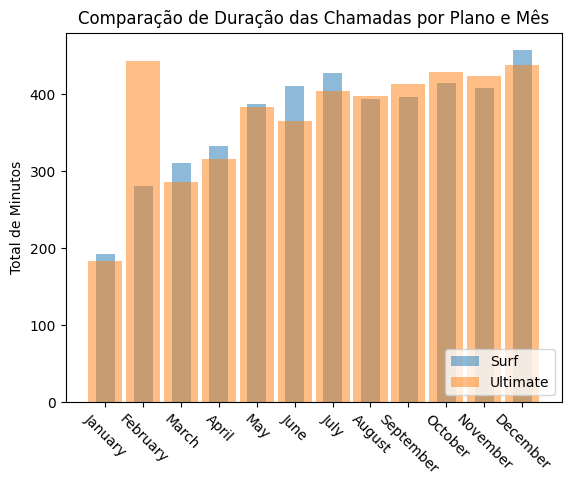

In [83]:
# Compare a duração média das chamadas de cada plano para cada mês. Crie um gráfico de barras para visualizar o resultado.

df = merged_df['plan'] == "surf" #fiz artibuindo uma variavel para ser menos custoso para o hardwere

surf = merged_df[df]
surf_mean = surf.groupby(['plan', 'month_name'])['total_minutes'].mean().reset_index(name='total_minutes')

ultimate = merged_df[~df]
ultimate_mean = ultimate.groupby(['plan', 'month_name'])['total_minutes'].mean().reset_index(name='total_minutes')

width = 0.9 
plt.bar(surf_mean['month_name'], surf_mean['total_minutes'], width-0.4, label='Surf', alpha=0.5)
plt.bar(ultimate_mean['month_name'], ultimate_mean['total_minutes'], width, label='Ultimate', alpha=0.5)
plt.xticks(rotation=-45)
plt.title('Comparação de Duração das Chamadas por Plano e Mês')
plt.ylabel('Total de Minutos')
plt.legend(loc='lower right')
plt.show()

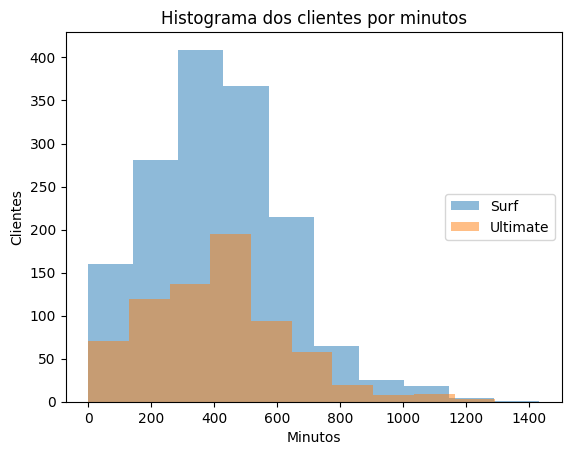

In [84]:
# Compare o número de minutos que os usuários de cada plano necessitam a cada mês. Construa um histograma.

plt.hist(surf['total_minutes'], bins=10, alpha=0.5, label='Surf')
plt.hist(ultimate['total_minutes'], bins=10, alpha=0.5, label='Ultimate')
plt.title('Histograma dos clientes por minutos')
plt.ylabel('Clientes')
plt.xlabel('Minutos')
plt.legend(loc='right')
plt.show()

In [85]:
# Calcule a média e a variância da duração mensal das chamadas

mean = merged_df['total_minutes'].mean()
var = np.var(merged_df['total_minutes'])
print(f"a media é: {mean} e a variância é: {var}")

a media é: 411.4925863596103 e a variância é: 48067.00576337274


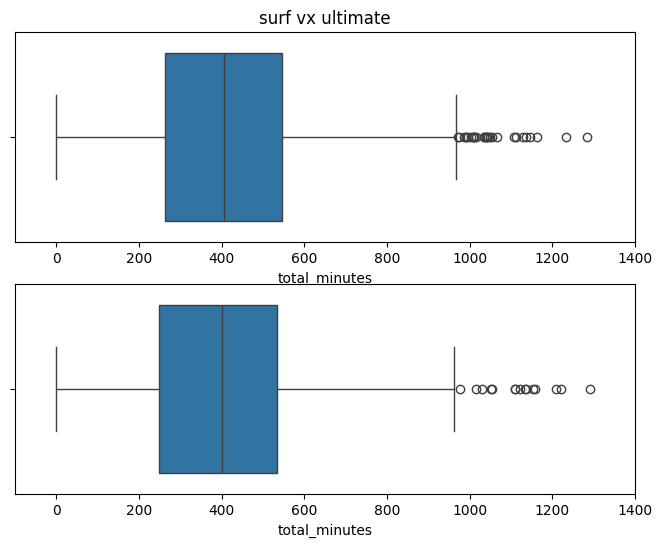

In [86]:
# Faça um diagrama de caixa para visualizar a distribuição da duração mensal das chamadas
fig, axes = plt.subplots(2, 1, figsize=(8, 6))

# Boxplot 1 (primeira linha)
sns.boxplot(data=surf['total_minutes'], ax=axes[0], orient='h').set_xlim(-100, 1400)
axes[0].set_title('surf vx ultimate')

# Boxplot 2 (segunda linha)
sns.boxplot(data=ultimate['total_minutes'], ax=axes[1], orient='h').set_xlim(-100, 1400)

plt.show()

No final no 2 ao 4 trimestre é quando tem mai demanda por minutos.

O histograma indica uma calda longa para a direita e grossa para a esquerda. 

A media(411) esta proxima da mediana(404) oque indica pouca assimetria. 

A maioria não importantando o plano gasta entre 300 a 500 minutos. Ou seja no caso do plano surf faz todo sentido pois está no limiar do cliente comprar uma expanção mensal(fazendo com que a empresa ganhe mais). Porém no plano ultimate o valor maximo de minutos passa de 500 para 3000 o que é muito irreal para o plano pois ninguém conseguiu chegar a este valor, levando em conta o boxplot do ultimate o valor maximo do plano ultimate deveria ser 1000 minutos. 


### Mensagens

C:\Users\jonat\AppData\Local\Temp\ipykernel_7892\3338005657.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  surf_mean = surf.groupby(['plan', 'month_name'])['messages_count'].mean().reset_index(name='messages_count')
C:\Users\jonat\AppData\Local\Temp\ipykernel_7892\3338005657.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ultimate_mean = ultimate.groupby(['plan', 'month_name'])['messages_count'].mean().reset_index(name='messages_count')


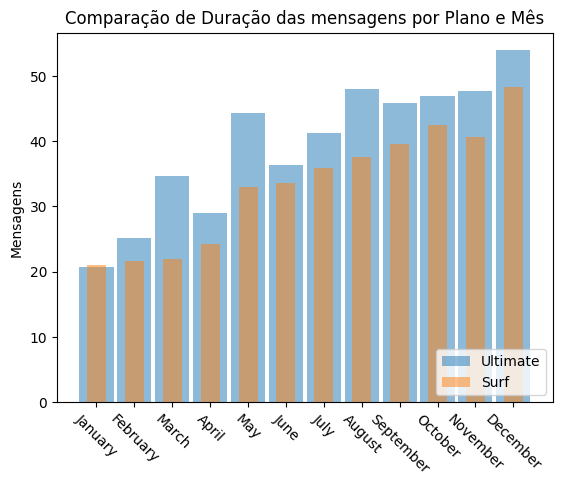

In [87]:
# Compare o número de mensagens que os usuários de cada plano costumam enviar a cada mês


surf_mean = surf.groupby(['plan', 'month_name'])['messages_count'].mean().reset_index(name='messages_count')

ultimate_mean = ultimate.groupby(['plan', 'month_name'])['messages_count'].mean().reset_index(name='messages_count')

width = 0.9 
plt.bar(ultimate_mean['month_name'], ultimate_mean['messages_count'], width, label='Ultimate', alpha=0.5)
plt.bar(surf_mean['month_name'], surf_mean['messages_count'], width-0.4, label='Surf', alpha=0.5)

plt.xticks(rotation=-45)
plt.title('Comparação de Duração das mensagens por Plano e Mês')
plt.ylabel('Mensagens')
plt.legend(loc='lower right')
plt.show()

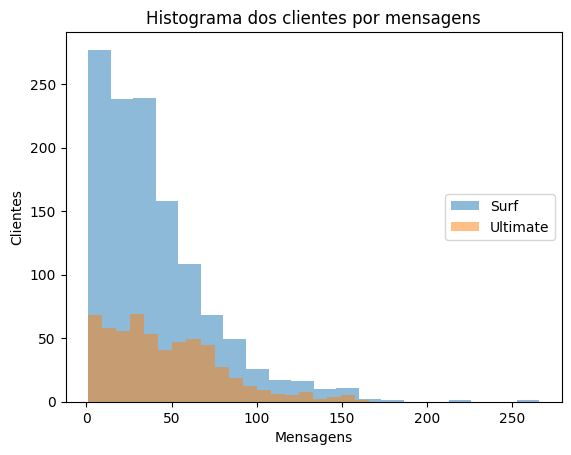

In [88]:

plt.hist(surf['messages_count'], bins=20, alpha=0.5, label='Surf')
plt.hist(ultimate['messages_count'], bins=20, alpha=0.5, label='Ultimate')
plt.title('Histograma dos clientes por mensagens')
plt.ylabel('Clientes')
plt.xlabel('Mensagens')
plt.legend(loc='right')
plt.show()


In [89]:
mean = merged_df['messages_count'].mean()
var = np.var(merged_df['messages_count'])
print(f"a media é: {mean} e a variância é: {var}")

a media é: 42.110188261351055 e a variância é: 1096.5210811384225


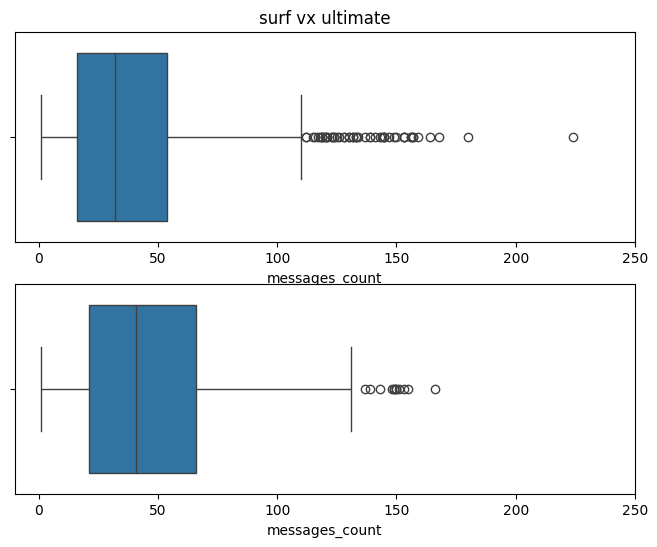

In [90]:

fig, axes = plt.subplots(2, 1, figsize=(8, 6))

# Boxplot 1 (primeira linha)
sns.boxplot(data=surf['messages_count'], ax=axes[0], orient='h').set_xlim(-10, 250)
axes[0].set_title('surf vx ultimate')

# Boxplot 2 (segunda linha)
sns.boxplot(data=ultimate['messages_count'], ax=axes[1], orient='h').set_xlim(-10, 250)

plt.show()


No final no 2 ao 4 trimestre é quando tem mai demanda por mensagens.

O histograma só tem uma calda longa para a direita oque indica assimetria dos dados

A media(42) esta proxima da mediana(34) oque indica muita assimetria. 

Por serem dados assimetricos tem muitos outlayers, e no caso do surf tem mais outlayers do que o ultimate.

No caso dos limites o surf tem um limite muito baixo de mensagens onde uma grande parte dos clientes pagam por mensagens extras. E no caso do ultimate tem um limite muito irrealistamente grande onde nenhum dos clientes chegou usar. 

### Internet

C:\Users\jonat\AppData\Local\Temp\ipykernel_7892\2220930195.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  surf_mean = surf.groupby(['plan', 'month_name'])['total_internet'].mean().reset_index(name='total_internet')
C:\Users\jonat\AppData\Local\Temp\ipykernel_7892\2220930195.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  surf["total_internet"]  = surf["total_internet"] / 1024
C:\Users\jonat\AppData\Local\Temp\ipykernel_7892\2220930195.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of

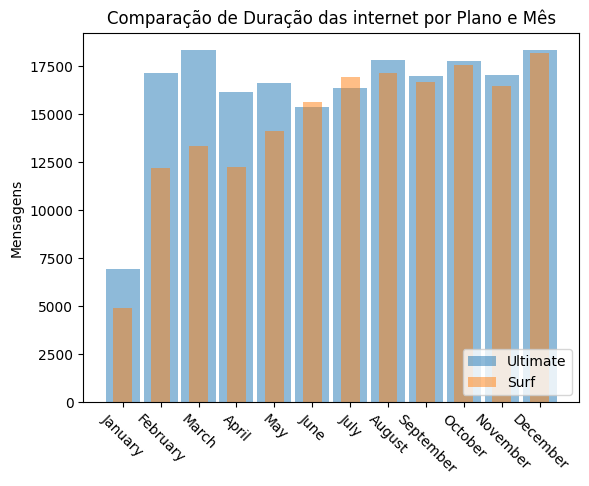

In [91]:
# Compare o número de mensagens que os usuários de cada plano costumam enviar a cada mês


surf_mean = surf.groupby(['plan', 'month_name'])['total_internet'].mean().reset_index(name='total_internet')
surf["total_internet"]  = surf["total_internet"] / 1024
ultimate_mean= ultimate.groupby(['plan', 'month_name'])['total_internet'].mean().reset_index(name='total_internet')
ultimate["total_internet"] = ultimate["total_internet"] / 1024
width = 0.9 
plt.bar(ultimate_mean['month_name'], ultimate_mean['total_internet'], width, label='Ultimate', alpha=0.5)
plt.bar(surf_mean['month_name'], surf_mean['total_internet'], width-0.4, label='Surf', alpha=0.5)

plt.xticks(rotation=-45)
plt.title('Comparação de Duração das internet por Plano e Mês')
plt.ylabel('Mensagens')
plt.legend(loc='lower right')
plt.show()

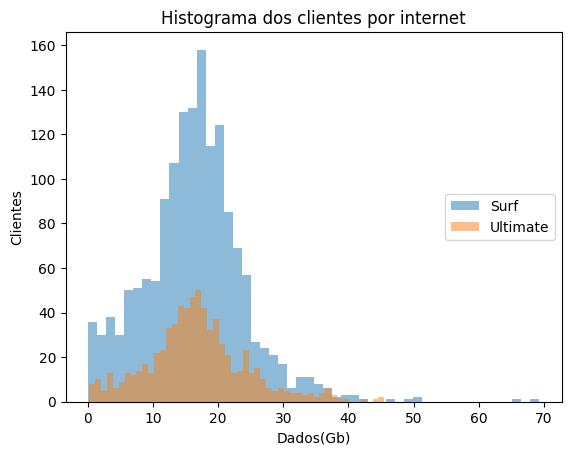

In [92]:

plt.hist(surf['total_internet'], bins=50, alpha=0.5, label='Surf')
plt.hist(ultimate['total_internet'], bins=50, alpha=0.5, label='Ultimate')
plt.title('Histograma dos clientes por internet')
plt.ylabel('Clientes')
plt.xlabel('Dados(Gb)')
plt.legend(loc='right')
plt.show()


In [93]:
surf_mean = surf['total_internet'].mean()
ultimate_mean = ultimate['total_internet'].mean()
print(f"a media de surf é: {surf_mean}a media de ultimate é: {ultimate_mean}")

a media de surf é: 16.325880993511312a media de ultimate é: 16.834611575321627


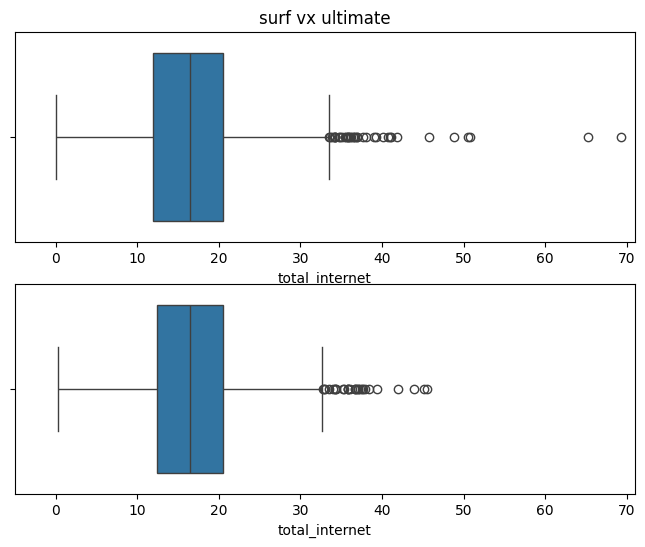

In [94]:

fig, axes = plt.subplots(2, 1, figsize=(8, 6))

# Boxplot 1 (primeira linha)
sns.boxplot(data=surf['total_internet'], ax=axes[0], orient='h').set_xlim(-5, 71)
axes[0].set_title('surf vx ultimate')

# Boxplot 2 (segunda linha)
sns.boxplot(data=ultimate['total_internet'], ax=axes[1], orient='h').set_xlim(-5, 71)

plt.show()

Apenas janeiro não gastam muito a internet.

O surf pega uma fatia maior do mercado. O histograma  tem uma calda longa para a direita.

A média do ultimate é apenas 0.5% a mais que o surf, oque indica que o uso da internet é muito parecido entre os planos.

O surf tem mais outlaiers mais para a direita, Oque indica que o limite esta baixo, e não abrange a maioria dos clientes. 

## Receita

C:\Users\jonat\AppData\Local\Temp\ipykernel_7892\3858695530.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  surf_mean = surf.groupby(['plan', 'month_name'])['conditional_total_sum'].mean().reset_index(name='conditional_total_sum')
C:\Users\jonat\AppData\Local\Temp\ipykernel_7892\3858695530.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  surf["conditional_total_sum"]  = surf["conditional_total_sum"]
C:\Users\jonat\AppData\Local\Temp\ipykernel_7892\3858695530.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True i

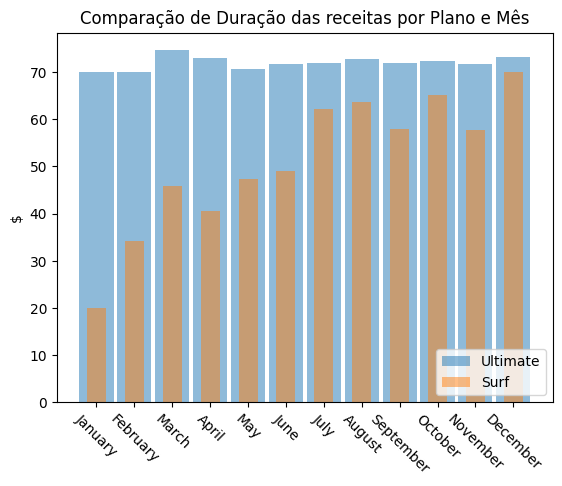

In [95]:
surf_mean = surf.groupby(['plan', 'month_name'])['conditional_total_sum'].mean().reset_index(name='conditional_total_sum')
surf["conditional_total_sum"]  = surf["conditional_total_sum"]
ultimate_mean= ultimate.groupby(['plan', 'month_name'])['conditional_total_sum'].mean().reset_index(name='conditional_total_sum')
ultimate["conditional_total_sum"] = ultimate["conditional_total_sum"]
width = 0.9 
plt.bar(ultimate_mean['month_name'], ultimate_mean['conditional_total_sum'], width, label='Ultimate', alpha=0.5)
plt.bar(surf_mean['month_name'], surf_mean['conditional_total_sum'], width-0.4, label='Surf', alpha=0.5)

plt.xticks(rotation=-45)
plt.title('Comparação de Duração das receitas por Plano e Mês')
plt.ylabel('$')
plt.legend(loc='lower right')
# plt.show()

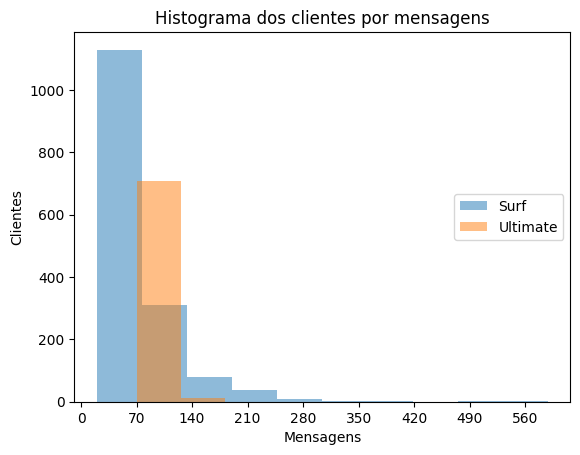

In [96]:

plt.hist(surf['conditional_total_sum'],bins=10, alpha=0.5, label='Surf')
plt.hist(ultimate['conditional_total_sum'],bins=2, alpha=0.5, label='Ultimate')
plt.title('Histograma dos clientes por mensagens')
plt.ylabel('Clientes')
plt.xlabel('Mensagens')
plt.legend(loc='right')
plt.xticks(ticks=np.arange(0, 600, 70)) 
plt.show()


In [97]:
surf_mean = surf['conditional_total_sum'].mean()
ultimate_mean = ultimate['conditional_total_sum'].mean()
print(f"a media de surf é: {surf_mean}a media de ultimate é: {ultimate_mean}")

a media de surf é: 60.32734621741895a media de ultimate é: 72.31388888888888


In [98]:
surf_mean

60.32734621741895

O ultimat tem uma receita mais estável durante o ano. e o surf tem  mais demanda no 3 e 4 trimestre

Tem mais dados no surf, ou seja mais cliente, e sei valor, oque atrapalha a analise. Mas tanto surf quanto ultimat tem uma calda longa para a direita.

A meda do valor da surf é $60 quando o valor do plano é $20 isso quer dizer que muitos clientes pagam extra. Enquanto no ultimat isso não acontece, a media sendo $72 e o valor do plano sendo $70 poucos clientes pagam extras.

## Teste hipóteses estatísticas

In [99]:
print("Hipóteses do teste:")
print("H0: A média de uso total da internet pelos usuários dos planos 'Surf' e 'Ultimate' é igual.")
print("Ha: A média de uso total da internet pelos usuários dos planos 'Surf' e 'Ultimate' é diferente.\n")
print(f"a media de surf é: {surf_mean:.2f} a media de ultimate é: {ultimate_mean:.2f}")
# Teste as hipóteses
alpha = 0.05
results = st.ttest_ind(
    surf['conditional_total_sum'].sample(n=700) , 
    ultimate['conditional_total_sum'].sample(n=700))
print(f'valor-p: {results.pvalue:.10f}')
if (results.pvalue < alpha):
    print("Rejeitamos a hipótese nula")
else:
    print("Não podemos rejeitar a hipótese nula")

Hipóteses do teste:
H0: A média de uso total da internet pelos usuários dos planos 'Surf' e 'Ultimate' é igual.
Ha: A média de uso total da internet pelos usuários dos planos 'Surf' e 'Ultimate' é diferente.

a media de surf é: 60.33 a media de ultimate é: 72.31
valor-p: 0.0000000000
Rejeitamos a hipótese nula


[Teste a hipótese de que a receita média dos usuários da área de NY-NJ difere dos usuários das demais regiões.]

In [100]:
# Realizar o merge
merged_table = pd.merge(users[['user_id', 'city']], merged_df[['user_id', 'conditional_total_sum']], on='user_id', how='inner')

grouped_df = merged_table.groupby(['user_id', 'city'], as_index=False)['conditional_total_sum'].sum()
# Resultado
in_NYNJ = grouped_df[grouped_df['city'].str.contains('NY-NJ', na=False)]
not_NYNJ = grouped_df[~grouped_df['city'].str.contains('NY-NJ', na=False)]


print("Hipóteses do teste:")
print("H0: A média de uso total da internet pelos usuários dos planos 'Surf' e 'Ultimate' é igual.")
print("Ha: A média de uso total da internet pelos usuários dos planos 'Surf' e 'Ultimate' é diferente.\n")


print(f"a media de surf é: {in_NYNJ['conditional_total_sum'].mean():.2f} a media de ultimate é: {not_NYNJ['conditional_total_sum'].mean():.2f}\n")

# Teste as hipóteses
alpha = 0.05
results = st.ttest_ind(
    in_NYNJ['conditional_total_sum'] , 
    not_NYNJ['conditional_total_sum'])
print(f'valor-p: {results.pvalue:.10f}')
if (results.pvalue < alpha):
    print("Rejeitamos a hipótese nula")
else:
    print("Não podemos rejeitar a hipótese nula")

Hipóteses do teste:
H0: A média de uso total da internet pelos usuários dos planos 'Surf' e 'Ultimate' é igual.
Ha: A média de uso total da internet pelos usuários dos planos 'Surf' e 'Ultimate' é diferente.

a media de surf é: 284.46 a media de ultimate é: 302.89

valor-p: 0.5798995337
Não podemos rejeitar a hipótese nula


## Conclusão geral

### Leitura e Identificação de Problemas:

O arquivo CSV está correto e não precisa de ajustes no separador de colunas.
Algumas colunas têm tipos de dados incorretos, como "churn_date" (que contém valores nulos, mas isso é esperado) e "call_date" (que não está no tipo datetime).
A coluna "message date" também não está no tipo datetime.
A coluna "session_date" tem o tipo de dado errado e "mb_used" tem valores zerados (indicando clientes que não usaram dados).

### Observações sobre Planos e Gastos:

O custo inicial do plano mais caro é maior, mas o aumento do valor para adicionar mais minutos, mensagens ou dados é mais barato.
A demanda por minutos é maior nos trimestres 2 a 4.
O histograma de minutos de uso tem uma cauda longa à direita e grossa à esquerda, com a média (411) próxima da mediana (404), indicando pouca assimetria.
A maioria dos clientes gasta entre 300 e 500 minutos, o que faz sentido no plano Surf, pois está próximo ao limiar para expansão mensal. No plano Ultimate, o valor máximo de minutos é irrealista (chega até 3000 minutos).

### Análise sobre Mensagens e Internet:

A demanda por mensagens também aumenta nos trimestres 2 a 4.
O histograma de mensagens tem uma cauda longa à direita, indicando assimetria e muitos outliers, especialmente no plano Surf.
O uso da internet é mais baixo em janeiro, e o plano Surf tem maior fatia do mercado.
A média de uso de internet no plano Ultimate (72) é ligeiramente maior do que no Surf (60), mas o uso de ambos os planos é muito parecido.

### Análise de Outliers e Limites:

O plano Surf tem mais outliers e um limite de mensagens muito baixo, fazendo com que muitos clientes paguem por mensagens extras. Já o plano Ultimate tem um limite irrealisticamente grande, que nenhum cliente alcança.
O plano Surf tem mais demanda nos trimestres 3 e 4.
A receita no plano Ultimate é mais estável durante o ano, enquanto o Surf tem mais variabilidade.
A média de receita do plano Surf é $60, embora o preço do plano seja $20, indicando que muitos clientes pagam extras. No plano Ultimate, a média de receita é $72, próximo ao valor do plano ($70), o que significa que poucos clientes pagam extras.

### Testes de Hipóteses:

Hipótese sobre a receita média entre planos Ultimate e Surf: A média de receita no plano Surf é $60.33 e no Ultimate é $72.31. O valor-p (0.0000224847) é muito pequeno, portanto, rejeitamos a hipótese nula de que as receitas médias são iguais.
Hipótese sobre a receita média entre usuários da área de NY-NJ e demais regiões: A média de receita para NY-NJ é 284.46 e para outras regiões é 302.89. O valor-p (0.5798995337) é alto, portanto, não podemos rejeitar a hipótese nula, indicando que as receitas médias entre as duas áreas não são significativamente diferentes.